<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass3/hpdp/ZProMax/ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York Bus Rides Service Searches**

| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| LING WAN YIN | A21EC0047 | Assignment 3|
|NG SUANG JOO | A21EC0102 | Assignment 4 |
|FONG KHAH KHEH | A21EC0026 | Assignment 5|

## **Dataset Selection**
The dataset `'searches.csv'` reflects every search query entered on the bus rides booking platform in New York. This dataset is sourced from the [Kaggle](https://www.kaggle.com/datasets/asimzahid/new-york-bus-rides-service?select=searches.csv) website.

**Dataset descriptions:**
- This dataset has a total of 5699336 records with 13 columns of attributes.

The following shows the attributes and its representations.
  
|Attribute|Description|
|:--------|:----------|
|`session_id`|Session of the search|
|`search_id`|Unique search in the session|
|`user_id`|ID of the user|
|`search_city`|City where the search happened|
|`search_time`|Local time of the search|
|`num_of_results`|Number of results returned for the search |
|`is_result`|Whether a search gave a result or not|
|`median_pickup_walk_time`| Estimated time taken by user to walk from his desired pickup to the bus station|
|`median_dropoff_walk_time`|Estimated time taken by user to walk from the bus station his desired destination|
|`median_bus_travel_time`|Estimated bus travel time|
|`high_demand_val`|Indicates very few seats left or that the bus is full|
|`user_device_os`|Platform of the mobile device|
|`user_device_app_version`|App version number|

## **Setting Up the Environment**

In [1]:
import numpy as np
import pandas as pd
import dask
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Helpful functions and classes**

In [2]:
class DfOverview:
    """
        Give an overview for a given data frame,
        like null persentage for each columns,
        unique value percentage for each columns and more
    """

    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def missing_value(self) -> None:
        nullSum = self.df.isna().sum()
        return [col for col in nullSum]

    def percentage(self, list):
        return [str(round(((value / self.df.shape[0]) * 100), 2)) + '%' for value in list]

    def getOverview(self) -> None:

        _columns = [column for column in self.df]
        _count = self.df.count().values
        _unique = [self.df[column].value_counts().shape[0] for column in self.df]
        _missing_values = self.missing_value()

        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype']
        data = zip(
            _columns,
            _count,
            _missing_values,
            self.percentage(_missing_values),
            _unique,
            self.percentage(_unique),
            self.df.dtypes
        )
        new_df = pd.DataFrame(data=data, columns=columns)
        return new_df

In [3]:
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

### **Reading data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read the searches.csv file
df_ori = dd.read_csv(
    '/content/drive/My Drive/colab/searches.csv', assume_missing=True)

# Compute the Dask DataFrame to get a Pandas DataFrame
df=df_ori.compute()

In [6]:
# Display some of the data
df

,session_id,search_id,user_id,search_city,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_os,user_device_app_version
0,7c80fae5-210c-4ace-a5df-5221d6a5a008,6d2b4ed4-88bf-47bb-95fd-0bbecd824775,5cfe072e5612de0019c6f4b5,New York,2020-02-24 13:36:19.625 UTC,4.0,True,600.0,1440.0,3336.0,0.0,android,291.0
1,27e49e8d-fd08-45e1-9b69-a3979bcb2fcb,2743ce8a-6f00-4af6-931e-35ba272ae55a,5bec3404b5d05900188c824e,New York,2019-11-06 14:27:16.451 UTC,40.0,True,300.0,10740.0,1622.5,1.0,android,280.0
2,a615f255-8b71-4d5e-86e5-b529a8932f98,ad262947-40bf-4d69-8af5-a0ed0df3d7ce,5d84f5b80143a0001a8a5469,New York,2020-02-27 14:44:14.513 UTC,10.0,True,960.0,1320.0,3685.0,0.0,android,291.0
3,14fbc27c-a7cd-41ea-8f5a-4df4bd9309a5,ca2f00ab-0bc0-470d-8ff8-2264b622f9a2,5c339f5fb537b60019325625,New York,2019-12-05 17:00:39.381 UTC,40.0,True,660.0,1260.0,4516.5,0.0,android,285.0
4,c6345da5-850c-4975-89a3-ecc0f55b8914,7b9e5aee-101d-455b-a92d-d8b2b019c8db,5c995c91ade3f8001a34d524,New York,2019-12-10 01:06:36.255 UTC,10.0,True,0.0,1740.0,5056.5,0.0,android,286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380150,7d6535a2-0253-47ef-b8a9-dcb686c95fe1,fa1af74d-c207-48a5-8072-c83676770d9e,5d6acc62bd8873001a53d18f,New York,2019-10-29 00:15:45.167 UTC,34.0,True,840.0,540.0,3511.0,0.0,android,278.0
380151,193d707d-14bd-4707-8dae-8bb81c09c6fc,2c905971-762f-4569-87f9-b8ba81db6060,5cbf5c3121e88800196fb742,New York,2019-11-24 21:41:02.951 UTC,10.0,True,480.0,600.0,5281.5,0.0,android,284.0
380152,68f855ee-effb-4ce7-ae48-7598d1f39cc7,bb304842-0841-4fb1-a745-ecccc6d4f694,5b4647b5d4a7ed0010ca44bf,New York,2020-02-26 20:21:39.048 UTC,10.0,True,60.0,540.0,4081.0,0.0,ios,3390.0
380153,7c6e56c8-9d05-4bed-aa93-1c4dfc2b37d1,47d0af22-2d8d-4e49-9393-b3909cc8318d,5b8eef4b5b1731000fa2fed7,New York,2019-11-26 15:13:15.526 UTC,40.0,True,360.0,540.0,1640.5,0.0,android,284.0


## **Data Preprocessing**

In [7]:
# number of elements(cells) in the df
df.size

74091368

In [8]:
# rows and columns in the df
df.shape

(5699336, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5699336 entries, 0 to 380154
Data columns (total 13 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   search_id                 object 
 2   user_id                   object 
 3   search_city               object 
 4   search_time               object 
 5   num_of_results            float64
 6   is_result                 bool   
 7   median_pickup_walk_time   float64
 8   median_dropoff_walk_time  float64
 9   median_bus_travel_time    float64
 10  high_demand_val           float64
 11  user_device_os            object 
 12  user_device_app_version   float64
dtypes: bool(1), float64(6), object(6)
memory usage: 570.7+ MB


### Handling missing value

In [10]:
df.isna().sum()

session_id                        0
search_id                         0
user_id                           0
search_city                       0
search_time                       0
num_of_results                    0
is_result                         0
median_pickup_walk_time     1324911
median_dropoff_walk_time    1324911
median_bus_travel_time      1232714
high_demand_val                   0
user_device_os                 3009
user_device_app_version        3009
dtype: int64

It is observed that there are missing values in the columns `median_pickup_walk_time`, `median_dropoff_walk_time` & `median_bus_travel_time` and this could possibly be due to the `is_result` being **'False'**. `is_result` being **'False'** means that the search for bus rides is unsuccessful. Thus, in this case, impute missing values with the value of zero.

In [11]:
# Impute missing values with the value of zero.
df.loc[df['is_result'] == False, 'median_pickup_walk_time'] = 0
df.loc[df['is_result'] == False, 'median_dropoff_walk_time'] = 0
df.loc[df['is_result'] == False, 'median_bus_travel_time'] = 0

Whereas, handle the rows of `median_pickup_walk_time` & `median_dropoff_walk_time` having **'True'** (`is_result`) by imputing with the median value.

In [12]:
# Impute missing values with the median
median_values = df['median_pickup_walk_time'].median()
df['median_pickup_walk_time'].fillna(median_values, inplace=True)

# Repeat for other columns
median_values = df['median_dropoff_walk_time'].median()
df['median_dropoff_walk_time'].fillna(median_values, inplace=True)

median_values = df['median_bus_travel_time'].median()
df['median_bus_travel_time'].fillna(median_values, inplace=True)

Investigation of the remaining records with
 **null** value in the column of `user_device_os` is shown below.                 

In [13]:
df[df['user_device_os'].isnull()]

,session_id,search_id,user_id,search_city,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_os,user_device_app_version
1913,ae7537e2-30b8-42da-8014-6283eef908ac,1eea6365-4721-4144-b30a-4025665bf9be,5b9f7f19ca08ca000f74f069,New York,2019-12-28 19:54:39.431 UTC,40.0,True,9600.0,180.0,2766.0,0.0,NaN,NaN
2444,38621a5a-fcdf-4444-8353-13b0dfbed5b4,7208b6b5-0482-4d7c-be4b-aacbad350e40,5d8a36556c0bfc0019378a24,New York,2020-02-19 21:36:11.368 UTC,10.0,True,180.0,840.0,2302.0,0.0,NaN,NaN
11925,67f8cb61-abad-4d87-b932-3c08c28084e7,ed752db6-a43f-4757-9006-590b8a896c39,5bb6d7e797885f000fbef720,New York,2019-11-19 13:23:33.243 UTC,40.0,True,1020.0,840.0,3435.5,2.0,NaN,NaN
12944,b5e4ad58-ec7b-4dee-a11f-32a0f6ee51e3,a6c5f96c-9670-40c9-b9dc-52c0cb3c695d,5bc571649b58ef00180ebe8a,New York,2019-10-20 02:21:47.959 UTC,10.0,True,1290.0,1440.0,3713.0,0.0,NaN,NaN
13198,0bd8caa4-f13d-4a6e-8d97-8596dad44924,11723b41-5b60-43d5-a895-66d300fb6f22,5bc571649b58ef00180ebe8a,New York,2019-10-20 02:19:31.424 UTC,30.0,True,1290.0,1620.0,665.5,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367556,c7409337-f073-4efc-89c0-d64404a2e4ec,adf72b70-3d1a-4ffd-9395-e25eb74cca4a,5c2c90991e5ba60019869b65,New York,2019-11-23 11:09:42.793 UTC,0.0,False,0.0,0.0,0.0,0.0,NaN,NaN
368670,c7d62229-d818-43e5-9d8c-a05b21e76d76,e699712f-41a3-4bbd-9dec-242a1b92c401,5baceb7870e9f0000fdc503f,New York,2019-10-18 16:45:05.446 UTC,34.0,True,540.0,480.0,3394.0,1.0,NaN,NaN
370112,464db9c5-83f5-47dd-8000-f67a8c4cf6a1,0e03cc53-ee9f-4cf3-96a8-fe4f5f5f9732,5ba5880b325dec001341c83f,New York,2019-12-14 00:08:55.856 UTC,0.0,False,0.0,0.0,0.0,0.0,NaN,NaN
373636,6668b386-f78e-4e49-a79e-e60673d6649d,e171f064-de04-43c4-811e-36d8a6fdf7a9,5bd920c1b9a55400194cc337,New York,2019-12-01 01:01:07.424 UTC,30.0,True,540.0,180.0,3624.5,2.0,NaN,NaN


It shows that the rows having **null** in `user_device_os` are associated with the column of `user_device_app_version`.

In [14]:
# Impute missing values with the most frequent value for user_device_os
most_frequent_os = df['user_device_os'].mode()[0]
df['user_device_os'].fillna(most_frequent_os, inplace=True)

# Impute missing values with the most frequent value for user_device_app_version
most_frequent_app_version = df['user_device_app_version'].mode()[0]
df['user_device_app_version'].fillna(most_frequent_app_version, inplace=True)

In [15]:
df_overview = DfOverview(df)
df_overview.getOverview()

,Column,count,missing_value_count,Missing_value_percentage,unique_value_count,unique_value_percentage,dtype
0,session_id,5699336,0,0.0%,5699336,100.0%,object
1,search_id,5699336,0,0.0%,5699336,100.0%,object
2,user_id,5699336,0,0.0%,201893,3.54%,object
3,search_city,5699336,0,0.0%,1,0.0%,object
4,search_time,5699336,0,0.0%,5697418,99.97%,object
5,num_of_results,5699336,0,0.0%,101,0.0%,float64
6,is_result,5699336,0,0.0%,2,0.0%,bool
7,median_pickup_walk_time,5699336,0,0.0%,1203,0.02%,float64
8,median_dropoff_walk_time,5699336,0,0.0%,1305,0.02%,float64
9,median_bus_travel_time,5699336,0,0.0%,25458,0.45%,float64


From the table above, the results (unique_value_count) of the `user_device_os` is weird, it should be the value of 2 instead. So, let's investigate the results.

### Data standardization

In [16]:
df['user_device_os'].unique()

array(['android', 'ios', 'iOS'], dtype=object)

Generally, the word '**ios**' has the same meaning as '**iOS**'. So, in this case, replace the word '**iOS**' with '**ios**'.

In [17]:
df['user_device_os'] = df['user_device_os'].replace('iOS', 'ios')

### Dropping unnecessary columns
The percentage of uniqueness of the column `search_city` is **0%**, which means every row has the same value. So, drop the column as it does not provide any distinguishing features.

In [18]:
df.drop(columns=['search_city'], inplace=True)

In [19]:
# search for duplicate rows and drop them
drop_duplicates(df)

No duplicate rows were found.


Let's check whether there is any duplication value since the uniqueness percentage of `user_id` is significantly low, which is only *3.54%*.

In [20]:
df.duplicated(subset=['user_id']).all()

False

In [21]:
df.sample(5)

,session_id,search_id,user_id,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_os,user_device_app_version
54942,7a512984-ff0b-45e1-9046-d749f114d0cf,5cf77db5-c89c-4a1c-9a93-a42d6784fc68,5b80389fd1f31e000fec141e,2019-12-09 20:55:24.832 UTC,10.0,True,360.0,270.0,4422.0,0.0,android,259.0
40328,8fabea4b-6a43-4235-a580-565897836298,58bbe748-fbfb-49c6-a798-a8f267ebe9b1,5e464d63f78732001abf821b,2020-02-15 07:15:43.326 UTC,10.0,True,3360.0,5640.0,10924.5,2.0,android,291.0
167058,8e0889a5-4ab4-4d2f-bb04-a2d997ed53bc,860b09a1-29e9-475f-aa68-1a19c4857b3b,5bc37a0bf71a44001965b19f,2019-12-03 14:58:32.636 UTC,10.0,True,0.0,360.0,4369.5,2.0,android,284.0
323957,850f43ef-b2f0-4835-9891-1faa7393f901,2b9bbf5a-4232-47d9-a04f-6ad8aae1abc1,5c1823bf79a7ce0019ecfc79,2019-12-28 19:54:59.29 UTC,10.0,True,1080.0,1290.0,3351.0,0.0,android,276.0
273887,a5940f3d-cd94-4958-b4bf-4d98aea021ad,36234e4d-adc8-4653-9d41-a1baab03381d,59f8b18f633806000fe28d8c,2020-02-11 17:14:35.421 UTC,0.0,False,0.0,0.0,0.0,0.0,android,291.0


Now, the data should be ready for analysis.

## **Exploratory Data Analysis**



### **Summary Statistics**

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_of_results,5699336.0,14.898500,14.752780,0.0,7.0,10.0,25.0,100.0
median_pickup_walk_time,5699336.0,1118.785908,2282.368129,0.0,0.0,420.0,960.0,83940.0
median_dropoff_walk_time,5699336.0,828.744241,2007.972145,0.0,60.0,360.0,840.0,85560.0
median_bus_travel_time,5699336.0,2513.465231,2106.038159,0.0,799.0,2511.0,3648.5,27923.0
high_demand_val,5699336.0,0.672304,1.661534,0.0,0.0,0.0,0.0,10.0
user_device_app_version,5699336.0,847.956624,1183.802021,40.0,279.0,286.0,291.0,3390.0


The table above displays an overall summary of the statistics of the numeric attributes in the dataset.

### **Data Visualization & Data Exploration**

#### **Univariate analysis**

##### user_id

In [23]:
counts_df = df['user_id'].value_counts().rename_axis('user_id').reset_index(name='count')
counts_df

,user_id,count
0,5b82db2e94307b00104b3d7b,1685
1,5c1888a76946ec0019a2624b,1674
2,5b4b6cf364eeda000f352012,1529
3,5bb24afa8c9d14000fbf569e,1451
4,5cfe436d92070500197236a4,1234
...,...,...
201888,5b17d602d3a930000f78d19a,1
201889,5e14caea9d2b42001ad6d671,1
201890,5de664a185860c001a1bcb55,1
201891,5d0e5a225b6d8a001a899064,1


In [24]:
average_searches_per_user = df.groupby('user_id')['search_id'].count().mean()

print("Average Searches per User:", average_searches_per_user)

Average Searches per User: 28.22948789705438


We have found that some `session_id` and `search_id` are being used by duplicated `user_id`, even though pandas.DataFrame.duplicated hasn't found any. It is because one `user_id` may search for bus rides numerous times on different days or times.

##### search_time

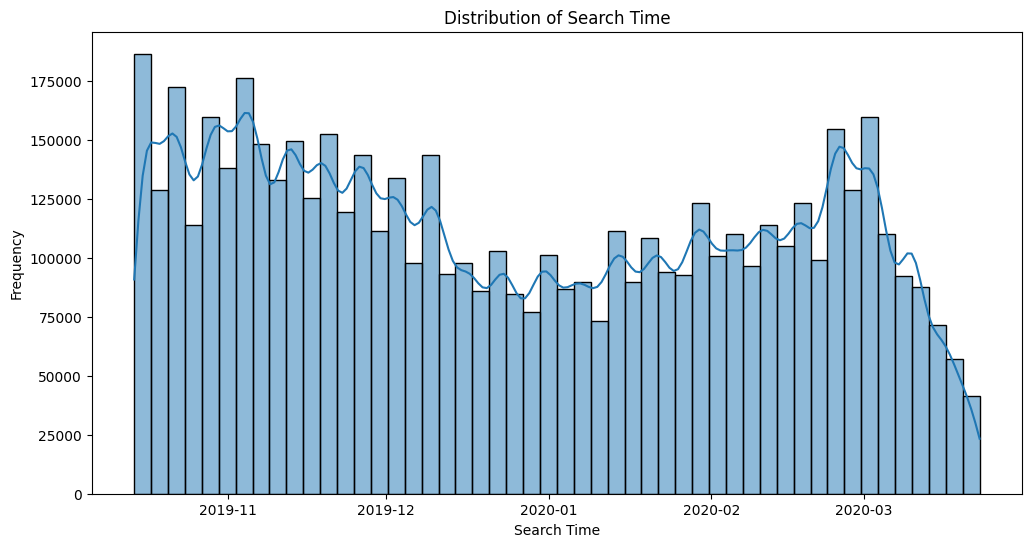

In [25]:
# Convert 'search_time' to datetime format
df['search_time'] = pd.to_datetime(df['search_time'])

# Create a histogram to visualize the distribution of 'search_time'
plt.figure(figsize=(12, 6))
sns.histplot(df['search_time'], bins=50, kde=True)
plt.title('Distribution of Search Time')
plt.xlabel('Search Time')
plt.ylabel('Frequency')
plt.show()

The distribution of `search_time` is dispersed.

##### num_of_results

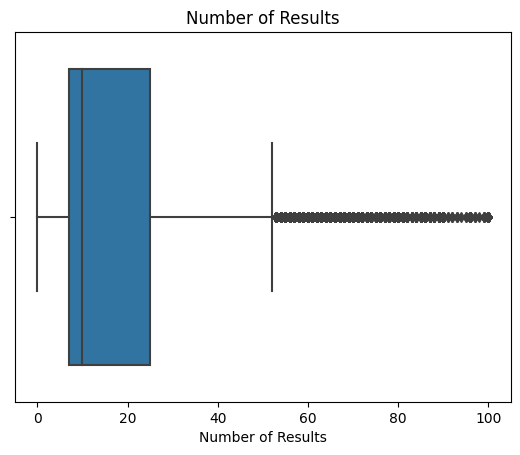

In [26]:
# Create a box plot to visualize the distribution of 'num_of_results'
sns.boxplot(x=df['num_of_results'])
plt.title('Number of Results')
plt.xlabel('Number of Results')
plt.show()

The box plot represents the number of results from searching for bus rides in New York. From the box plot, we can tell that the `num_of_results` is positively skewed with a concentration of values around the lower end.

##### is result


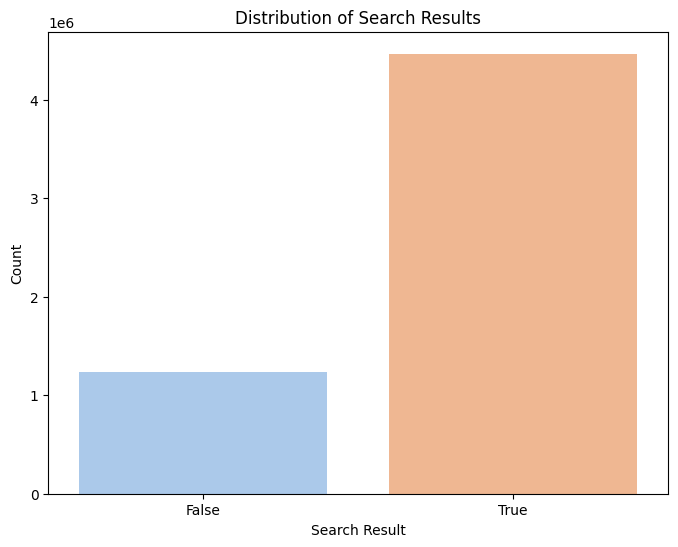

In [27]:
# Create a count plot to visualize the distribution of the 'is_result'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_result', data=df, palette='pastel')
plt.title('Distribution of Search Results')
plt.xlabel('Search Result')
plt.ylabel('Count')
plt.show()

There are more successful searches than unsuccessful searches, giving an overview that users may have a higher probability of having a successful search for bus rides.

##### median_pickup_walk_time

In [28]:
counts_df = df['median_pickup_walk_time'].value_counts().rename_axis('median_pickup_walk_time').reset_index(name='count')
counts_df

,median_pickup_walk_time,count
0,0.0,1448643
1,420.0,271332
2,360.0,252557
3,300.0,210171
4,240.0,207398
...,...,...
1198,18270.0,1
1199,83280.0,1
1200,17370.0,1
1201,46260.0,1


There are counts of `median_pickup_walk_time` value of **0** because the process of replacing the **null** value with **0** for `is_result = 'False'` during data preprocessing as having `'False'` denotes the failure of the searching process for bus rides.

##### median_dropoff_walk_time


In [29]:
counts_df = df['median_dropoff_walk_time'].value_counts().rename_axis('median_dropoff_walk_time').reset_index(name='count')
counts_df

,median_dropoff_walk_time,count
0,0.0,1388531
1,360.0,367163
2,180.0,274102
3,300.0,239708
4,240.0,217749
...,...,...
1300,32640.0,1
1301,24870.0,1
1302,64980.0,1
1303,31050.0,1


There are counts of `median_dropoff_walk_time` value of **0** because the process of replacing the **null** value with **0** for `is_result = 'False'` during data preprocessing as having `'False'` denotes the failure of the searching process for bus rides.

##### median_bus_travel_time

In [30]:
counts_df = df['median_bus_travel_time'].value_counts().rename_axis('median_bus_travel_time').reset_index(name='count')
counts_df

,median_bus_travel_time,count
0,0.0,1232714
1,2975.0,1046
2,3146.0,939
3,2711.0,927
4,3241.0,917
...,...,...
25453,8515.5,1
25454,12099.0,1
25455,8160.5,1
25456,14027.0,1


There are counts of `median_bus_travel_time` value of **0** because the process of replacing the **null** value with **0** for `is_result = 'False'` during data preprocessing as having `'False'` denotes the failure of the searching process for bus rides.

##### high_demand_val

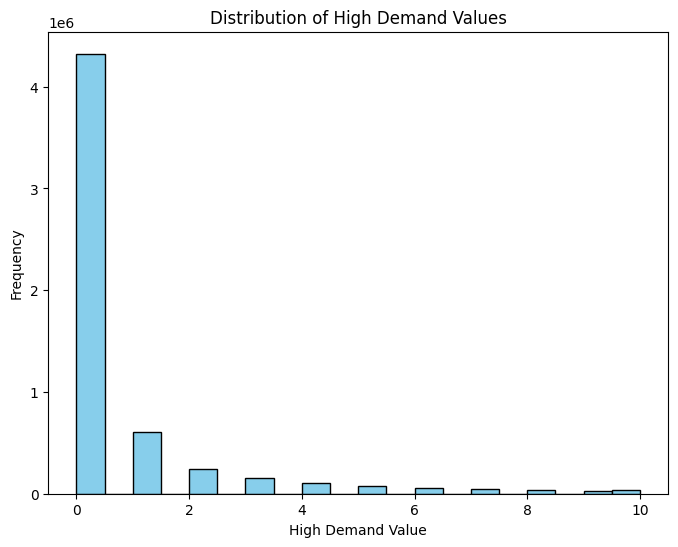

In [31]:
# Create a histogram to visualize the distribution of 'high_demand_val'
plt.figure(figsize=(8, 6))
plt.hist(df['high_demand_val'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of High Demand Values')
plt.xlabel('High Demand Value')
plt.ylabel('Frequency')
plt.show()

The `high_demand_val = '0'` has the highest counts, probably because there are too many missing values before data preprocessing.

##### user_device_os


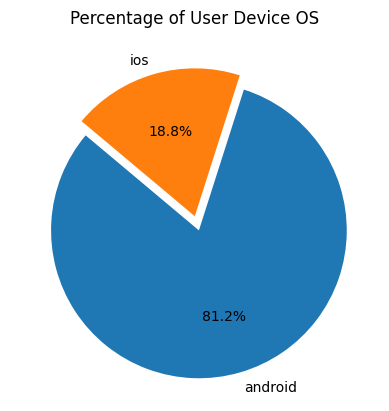

In [32]:
# Calculate the distribution of user devices based on operating systems
device_distribution = df['user_device_os'].value_counts()

# Explode the first slice (index 0)
myexplode = [0.1,0]

# Plot a pie chart
plt.pie(device_distribution, labels=device_distribution.index, autopct='%1.1f%%', explode=myexplode, startangle=140)
plt.title('Percentage of User Device OS')
plt.show()

Android contributes **81.2%** of the overall user device operating system, whereas ios only has **18.8%** of the overall user device operating system.

##### user_device_app_version




In [33]:
# Count the occurrences of each user_device_app_version
app_version_counts = df['user_device_app_version'].value_counts()

# Convert the counts to a DataFrame for better presentation
app_version_counts

286.0     1052800
291.0      866060
284.0      459116
277.0      441248
276.0      319500
           ...   
40.0           20
3181.0         13
260.0          13
80.0            8
44.0            3
Name: user_device_app_version, Length: 103, dtype: int64

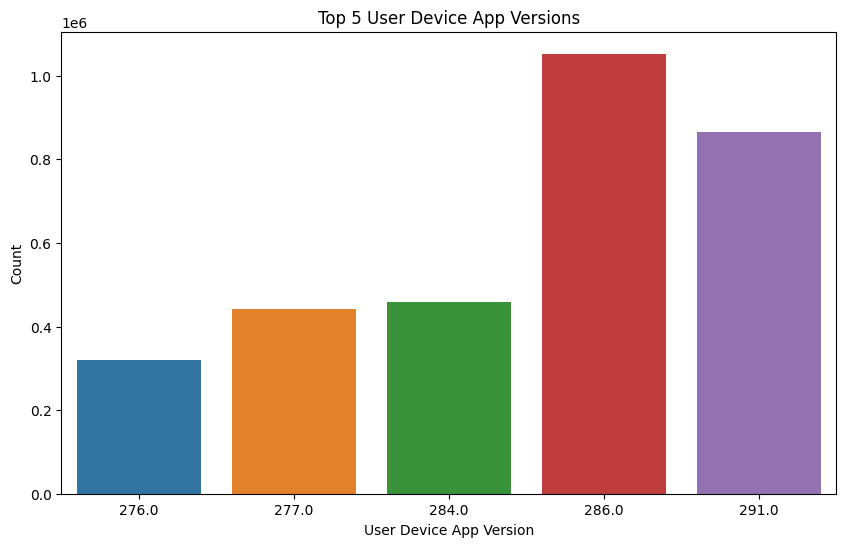

In [34]:
# Select top 5 app version number
top_app_versions = df['user_device_app_version'].value_counts().head(5)

# Create a bar plot representing the top 5 'user_device_app_version'
plt.figure(figsize=(10, 6))
sns.barplot(x=top_app_versions.index, y=top_app_versions.values)
plt.title('Top 5 User Device App Versions')
plt.xlabel('User Device App Version')
plt.ylabel('Count')
plt.show()

As there are too many different app version numbers, displaying the top five app version numbers used in searching for bus rides would be helpful for determining the most widely used user device app versions in the context of searches for bus rides. From the visualization, it is observed that `user_device_app_version` with a '**2xx**' value is the preferred `user_device_app_version` for the bus ride application platform among New Yorkers.

#### **Feature Engineering**

1. Extracting data like hour, month and year from the `search_time`.

In [35]:
# Extract the hour, month, year from 'search_time'
df['search_hour'] = df['search_time'].dt.hour
df['search_month'] = df['search_time'].dt.month
df['search_year'] = df['search_time'].dt.year

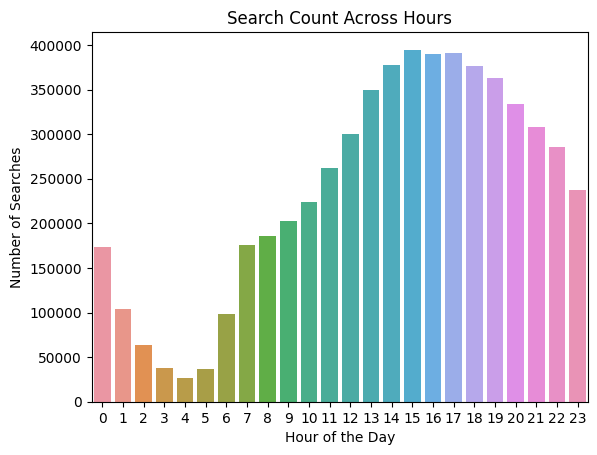

In [36]:
# Create a countplot to visualize the distribution of searches across hours
sns.countplot(x='search_hour', data=df)
plt.title('Search Count Across Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Searches')
plt.show()

From the count plot above, it can be concluded that 3 p.m. is the peak hour for searching for bus rides, as the number of searches at that time is the highest.

2. Creating a new feature `total_walk_time` with the summarization of the `median_pickup_walk_time` and `median_dropoff_walk_time`.

In [37]:
df['total_walk_time'] = df['median_pickup_walk_time'] + df['median_dropoff_walk_time']

3. Creating a binary feature `is_high_demand`, indicating whether there is high demand.

In [38]:
df['is_high_demand'] = df['high_demand_val'].astype(bool).astype(int)

#### **Correlation**

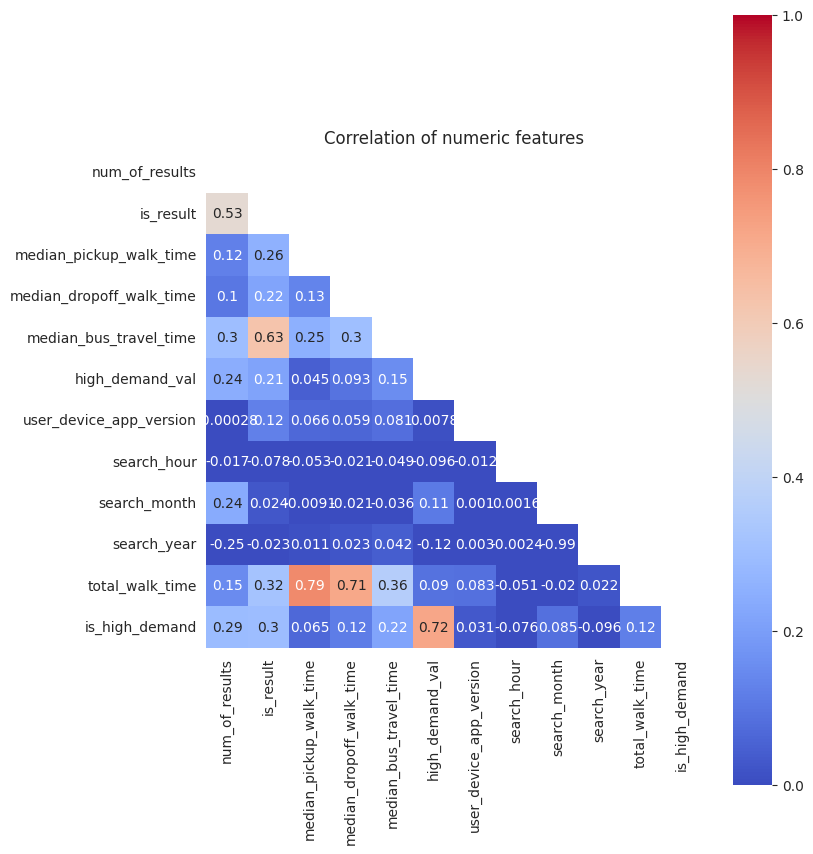

In [39]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(8, 10))
    f_ax = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="coolwarm")
plt.title('Correlation of numeric features')
plt.show()

The darker the cell colour, the higher the correlation between the numeric variables.

#### **Bivariate Analysis**


##### user_device_os & is_result

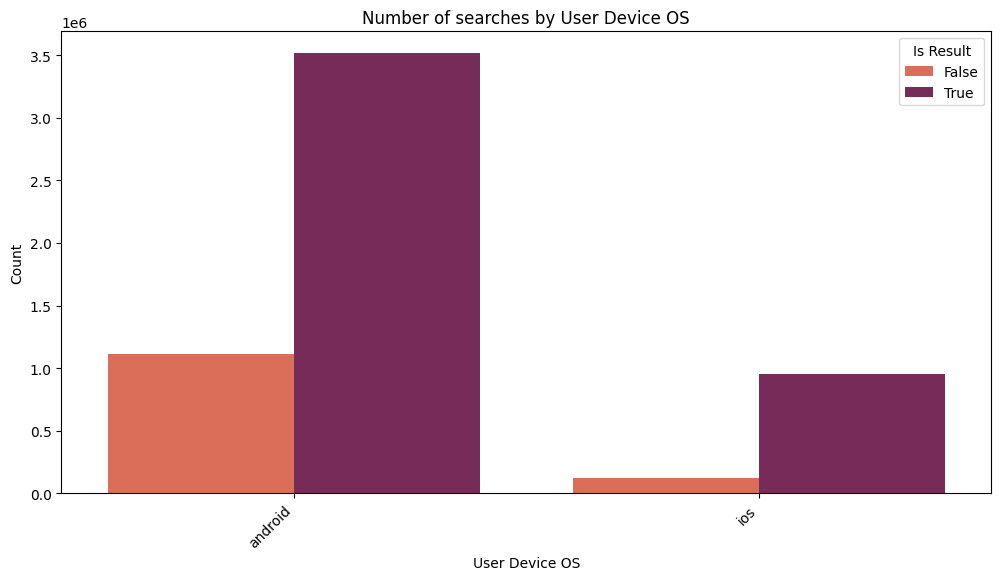

In [40]:
# Create a count plot to visualize the number of searches based on 'user_device_os' and 'is_result'
plt.figure(figsize=(12, 6))
sns.countplot(x='user_device_os', hue='is_result', data=df, palette="rocket_r")
plt.title('Number of searches by User Device OS')
plt.xlabel('User Device OS')
plt.ylabel('Count')
plt.legend(title='Is Result', labels=['False', 'True'])
plt.xticks(rotation=45, ha='right')
plt.show()

**Insights:**

- Android contributes the most to the user's device operation system used in searching for bus rides. This reveals that Android is the operating system of choice for New Yorkers over iOS. However, no matter the type of user device operating system, there are times when searches are not successful.

##### user_device_os & num_of_results

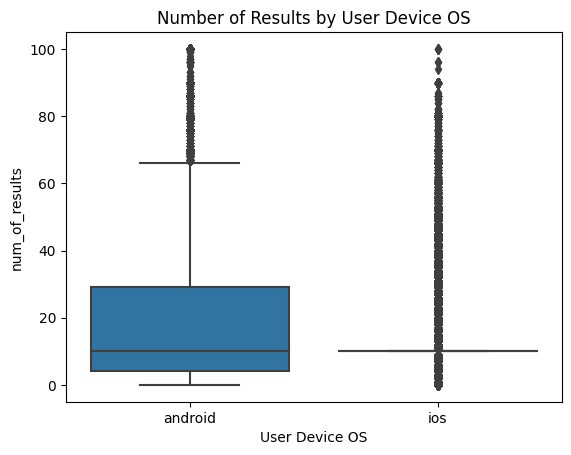

In [41]:
# Create a box plot to visualize the distribution of 'num_of_results' across different 'user_device_os'
sns.boxplot(x='user_device_os', y='num_of_results', data=df)
plt.title("Number of Results by User Device OS")
plt.xlabel('Number of results')
plt.xlabel('User Device OS')
plt.show()

**Insights:**

- The box plot for `user_device_os = ios` has only one line and outliers on both sides, indicating that there are outliers or extreme values in the dataset but that the data is generally homogeneous inside the central 50%. Meanwhile, the box plot for `user_device_os = android` suggests higher variability and the majority of the data is within the box and whiskers.

##### search_month & is_high_demand

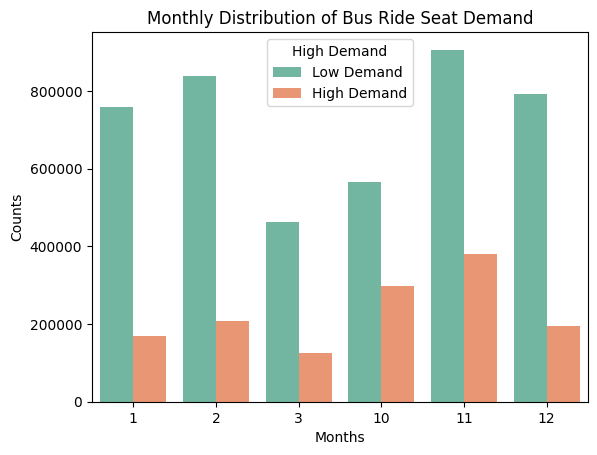

In [42]:
# Customize the colour palette
sns.set_palette("Set2")

# Create a count plot to visualize the monthly distribution of bus ride seat demand
ax=sns.countplot(x="search_month", hue="is_high_demand", data=df)
ax.legend(title='High Demand', labels=['Low Demand', 'High Demand'])
plt.title("Monthly Distribution of Bus Ride Seat Demand")
plt.xlabel('Months')
plt.ylabel('Counts')
plt.show()

**Insights:**

- November is the month when many New Yorkers utilize bus rides, as shown in the histogram above. However, it also contributes to the highest counts of low demand, which means there are higher possibilities of having seats available at certain times compared to other months.

##### user_device_app_version & is_high_demand

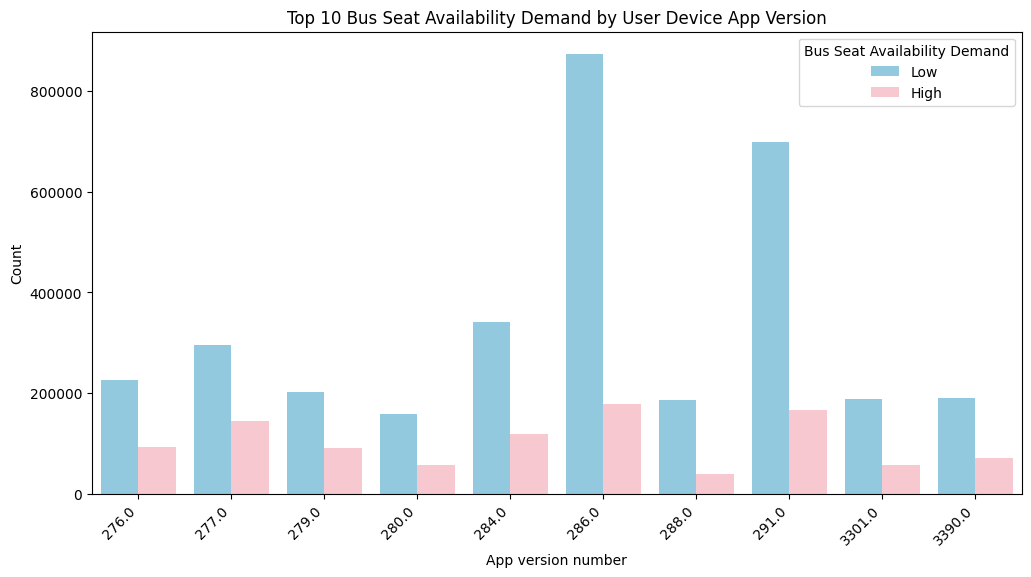

In [43]:
# Select the top 10 'user_device_app_versions' based on their counts
top_versions = df['user_device_app_version'].value_counts().nlargest(10).index

# Include only the top 10 versions
filtered_dataframe = df[df['user_device_app_version'].isin(top_versions)]

# Define a custom color palette for each 'is_high_demand'
custom_palette = {'Low': 'skyblue', 'High': 'pink'}

# Create a count plot categorized by 'search_year' and differentiated by 'is_high_demand'
plt.figure(figsize=(12, 6))
sns.countplot(x='user_device_app_version', hue='is_high_demand', data=filtered_dataframe, palette=sns.color_palette(custom_palette.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Bus Seat Availability Demand by User Device App Version')
plt.xlabel('App version number')
plt.ylabel('Count')
plt.legend(title='Bus Seat Availability Demand',labels=['Low', 'High'], loc='upper right')
plt.show()

**Insights:**

- According to the count plot above, it can be concluded that the `user_device_app_version = '286'` is the best app supported version by referring to the counts of bus seat availability demand because the counts also represent the number of successful searches for bus rides.

##### median_pickup_walk_time & median_dropoff_walk_time

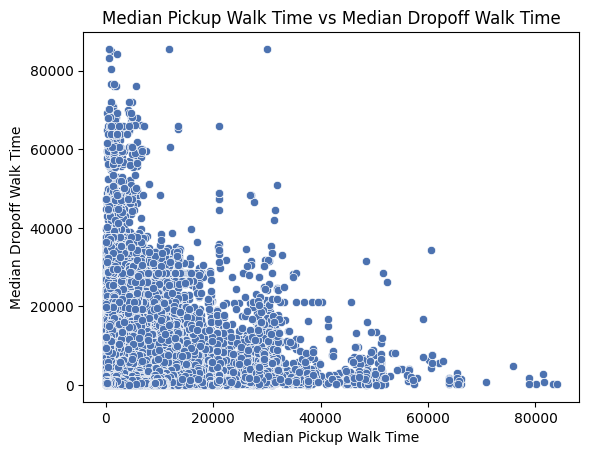

In [44]:
# Set the color palette to 'deep'
sns.set_palette('deep')

# Create a scatter plot to visualize the relationship between median pickup and dropoff walk times
sns.scatterplot(x='median_pickup_walk_time', y='median_dropoff_walk_time', data=df)
plt.title('Median Pickup Walk Time vs Median Dropoff Walk Time')
plt.xlabel('Median Pickup Walk Time')
plt.ylabel('Median Dropoff Walk Time')
plt.show()

**Insights:**

- This might point to situations where users have longer drop-off walks but shorter pickup walks, possibly as a result of particular features of the pickup sites or routes.

##### is_high_demand & total_walk_time

Text(0.5, 1.0, 'Average Total Walk Time by Demand Level')

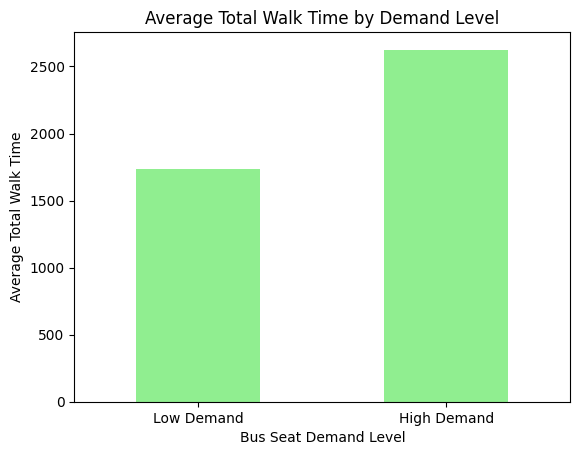

In [45]:
# Group the data by 'is_high_demand' and calculate the mean total walk time for each 'is_high_demand'
summary_data = df.groupby('is_high_demand')['total_walk_time'].mean()

# Create a bar plot to visualize the average total walk time for low and high demand
fig, ax = plt.subplots()
summary_data.plot(kind='bar', ax=ax, color='lightgreen')
ax.set_xticklabels(['Low Demand', 'High Demand'], rotation=0)
ax.set_xlabel('Bus Seat Demand Level')
ax.set_ylabel('Average Total Walk Time')
ax.set_title('Average Total Walk Time by Demand Level')

**Insights:**

- It demonstrates that total walking time—the estimated amount of time a user spends walking in both directions (to anf from bus stations) will somewhat increase in situations where there is a high demand for bus seats.

##### user_device_os & user_device_app_version

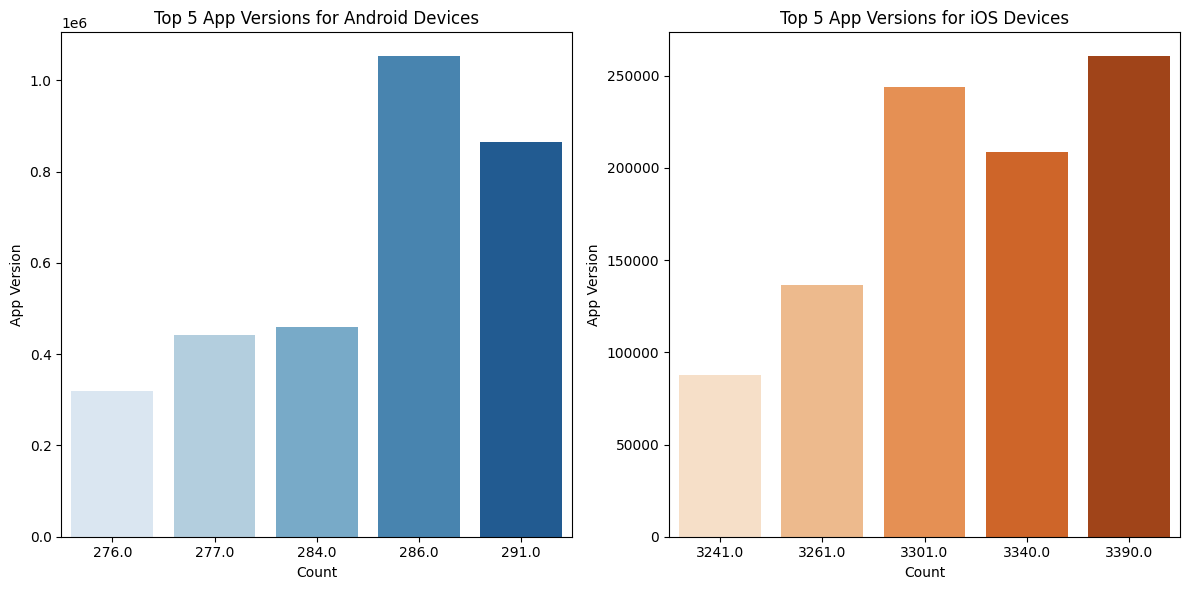

In [46]:
# Create a mapping table for Android
android_ver = df[df['user_device_os'] == 'android']['user_device_app_version'].value_counts().nlargest(5).reset_index(name='count')

# Create a mapping table for iOS
ios_ver = df[df['user_device_os'] == 'ios']['user_device_app_version'].value_counts().nlargest(5).reset_index(name='count')

# Set custom color palettes
android_palette = sns.color_palette("Blues", n_colors=len(android_ver))
ios_palette = sns.color_palette("Oranges", n_colors=len(ios_ver))

if not android_ver.empty:
    plt.figure(figsize=(12, 6))

    # Plot for Android
    plt.subplot(1, 2, 1)
    sns.barplot(x='index', y='count', data=android_ver, palette=android_palette)
    plt.title('Top 5 App Versions for Android Devices')
    plt.xlabel('Count')
    plt.ylabel('App Version')

if not ios_ver.empty:

    # Plot for iOS
    plt.subplot(1, 2, 2)
    sns.barplot(x='index', y='count', data=ios_ver, palette=ios_palette)
    plt.title('Top 5 App Versions for iOS Devices')
    plt.xlabel('Count')
    plt.ylabel('App Version')

    plt.tight_layout()
    plt.show()


**Insights:**
- From the bar chart above, it is observed that the top 5 app versions for iOS devices start with the value of '**3xxx**'.

##### total_walk_time & median_bus_travel_time

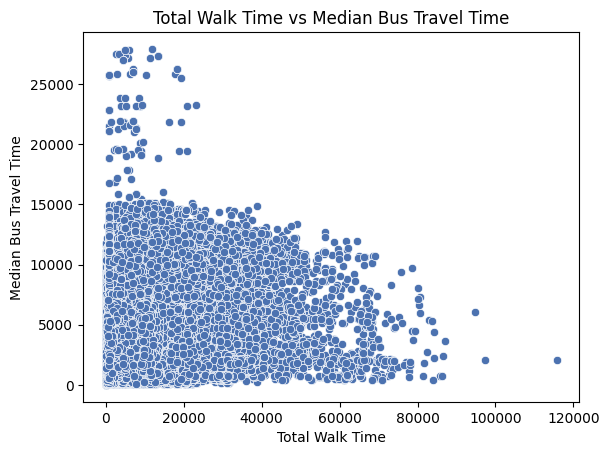

In [47]:
# Create a scatter plot to visualize the relationship between 'total_walk_time' and 'median_bus_travel_time'
sns.scatterplot(x='total_walk_time', y='median_bus_travel_time', data=df)
plt.title('Total Walk Time vs Median Bus Travel Time')
plt.xlabel('Total Walk Time')
plt.ylabel('Median Bus Travel Time')
plt.show()

**Insights:**
- Certain locations may have efficient bus routes, leading to shorter total walk times and vice versa. This could indicate that not every area has the same efficiency of bus routes.

##### search_id & is_high_demand

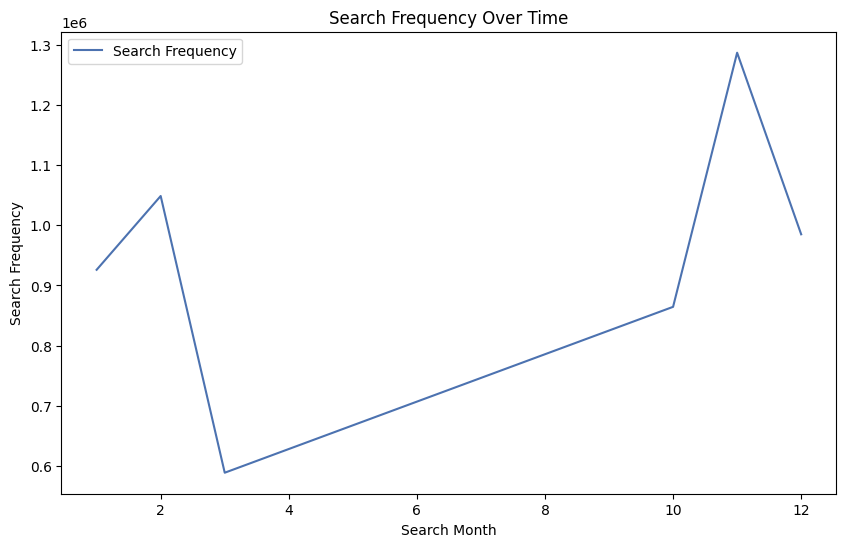

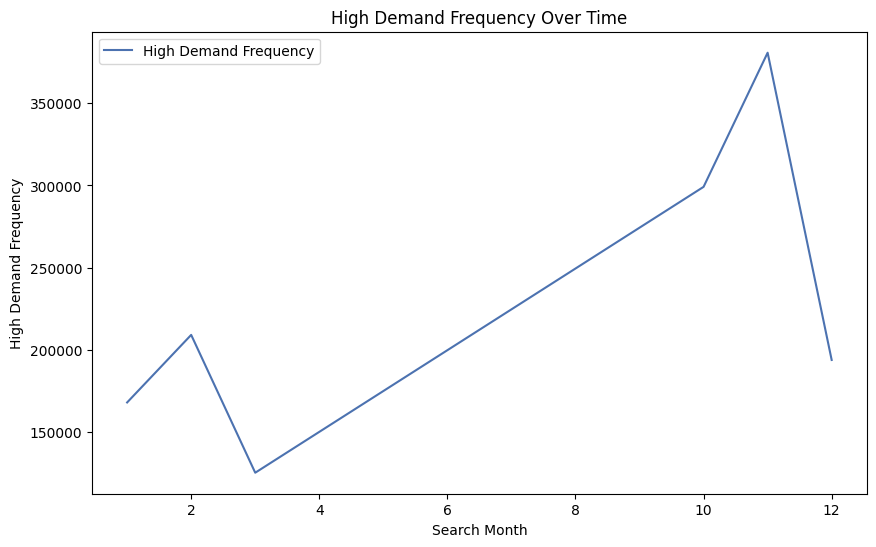

In [48]:
# Group the data by search year and search month
search_freq = df.groupby(['search_year', 'search_month'])['search_id'].count().reset_index()
high_demand_freq = df.groupby(['search_year', 'search_month'])['is_high_demand'].sum().reset_index()

# Merge the data
merged_data = pd.merge(search_freq, high_demand_freq, on=['search_year', 'search_month'])

# Create a line plot for search frequency
plt.figure(figsize=(10, 6))
sns.lineplot(x='search_month', y='search_id', data=merged_data, label='Search Frequency')
plt.title('Search Frequency Over Time')
plt.xlabel('Search Month')
plt.ylabel('Search Frequency')
plt.legend()
plt.show()

# Create a line plot for high demand frequency
plt.figure(figsize=(10, 6))
sns.lineplot(x='search_month', y='is_high_demand', data=merged_data, label='High Demand Frequency')
plt.title('High Demand Frequency Over Time')
plt.xlabel('Search Month')
plt.ylabel('High Demand Frequency')
plt.legend()
plt.show()

**Insights:**
- Based on the line plot, the search frequency is said to be influenced by the high demand frequency. More searches lead to a higher demand frequency, resulting in no available seats.

## **Conclusions**

**The key findings/insights gained from this EDA:**
-  New Yorkers prefer using **Android** compared to iOS when searching for bus rides. This could give an insight into the development of the application platform and focus further development mainly on Android compatibility and user experience. Despite that, the presence of **unsuccessful searches across both Android and iOS** indicates that search success is **not solely dependent** on the **user's operating system**.

- **iOS** users might have **more consistent search** success rates, while **Android** users would see a **greater variety** of search results.

- **November** is a month when a lot of people in New York take buses, as the histogram's high counts show. This could be due to various factors, including the season, the weather, events, and holidays. There are also certain days or situations where demand is reduced, which gives the overall impression that not every day the bus is fully occupied.

- The **peak hour** for bus rides, observed to be at **3 p.m.**, signifies a period of heightened demand and potential congestion within the bus transportation system in New York. This information is crucial for both commuters and bus companies to maximize the transportation experience in New York.

- There seems to be a **relationship between total walking time and high bus seat demand (`is_high_demand`)**. The **`is_high_demand`** also denotes that the city is **busy or crowded with people**, which is why people may have to take **longer walking durations**.

- There might be certain specific areas with **different variations in the efficiency of bus routes (higher or lower)**.

- The finding that specific **searches** tend to happen **more frequently** during periods of **high demand** is essential for customized recommendations and focused interventions.





